In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st
import sidetable
from scipy.stats import chi2_contingency
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### **Ana: Educación(Q4)]**

In [122]:
df_formacion=pd.read_csv('df_modificado1.csv', index_col=0)

In [123]:
df_formacion

,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,gender_def,continent
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,Asia
2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,A laptop,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,North America
4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Africa
25969,25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,A personal computer / desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,Asia
25970,25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Man,Europe
25971,25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,A laptop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Man,North America


In [124]:
df_formacion['education_q4'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: education_q4, dtype: int64

In [125]:
df_formacion['education_q4'].count()
#no tenemos ni nulos ni registros vacios para formación

25973

In [126]:
df_formacion['role_q5'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: role_q5, dtype: int64

In [127]:
df_formacion.duplicated().sum()

0

In [128]:
df_formacion.isnull().sum()

index                0
time                 0
age                  0
gender               0
country_q3           0
                 ...  
Q38_B_Part_10    23226
Q38_B_Part_11    21431
Q38_B_OTHER      25596
gender_def         355
continent            0
Length: 244, dtype: int64

### Nos quedamos con las columnas que seleccionamos en el grupo para las preguntas, que no tiene duplicados con un total de 25973 registros

In [129]:
df_def_fomacion=df_formacion.loc[:,[ 'index', 'time', 'age','gender_def','continent','country_q3','education_q4','role_q5','experience_q6','sector_q20','company_size_q21','anual_income_q25']]
df_def_fomacion

,index,time,age,gender_def,continent,country_q3,education_q4,role_q5,experience_q6,sector_q20,company_size_q21,anual_income_q25
0,0,910,50-54,Man,Asia,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,50-249 employees,"25,000-29,999"
1,1,784,50-54,Man,Asia,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999"
2,2,924,22-24,Man,Asia,Pakistan,Master’s degree,Software Engineer,1-3 years,Academics/Education,"1000-9,999 employees",$0-999
3,3,575,45-49,Man,North America,Mexico,Doctoral degree,Research Scientist,20+ years,Academics/Education,"1000-9,999 employees","30,000-39,999"
4,4,781,45-49,Man,Asia,India,Doctoral degree,Other,< 1 years,Academics/Education,50-249 employees,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,1756,30-34,Man,Africa,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Computers/Technology,"10,000 or more employees","15,000-19,999"
25969,25969,253,22-24,Man,Asia,China,Master’s degree,Student,1-3 years,NaN,NaN,NaN
25970,25970,494,50-54,Man,Europe,Sweden,Doctoral degree,Research Scientist,I have never written code,Academics/Education,"1000-9,999 employees",$0-999
25971,25971,277,45-49,Man,North America,United States of America,Master’s degree,Data Scientist,5-10 years,Online Service/Internet-based Services,"10,000 or more employees",NaN


In [130]:
df_def_fomacion.isnull().sum()

index                   0
time                    0
age                     0
gender_def            355
continent               0
country_q3              0
education_q4            0
role_q5                 0
experience_q6           0
sector_q20           9648
company_size_q21     9722
anual_income_q25    10582
dtype: int64

Nos interesan las personas trabajadoras, en nuestra encuesta hay muchos estudiantes, que están distorsionando las respuestas a nuestras preguntas, retiramos los registros que no hayan puesto el sector en el que trabajan. De el tamaño de empresa, y annual income haremos imputación de nulos.Para hacer los cruces de educación con esas columnas, mientras, trabajaremos con los nulos para no perder tantos datos.

In [131]:
df_def_fomacion2=df_def_fomacion.dropna(subset= ["sector_q20"], how = "any")


In [132]:
df_def_fomacion2.isnull().sum()*100/df_def_fomacion.shape[0]

index               0.000000
time                0.000000
age                 0.000000
gender_def          0.820082
continent           0.000000
country_q3          0.000000
education_q4        0.000000
role_q5             0.000000
experience_q6       0.000000
sector_q20          0.000000
company_size_q21    0.284911
anual_income_q25    3.596042
dtype: float64

In [133]:

df_def_fomacion.isnull().sum()*100/df_def_fomacion.shape[0]

index                0.000000
time                 0.000000
age                  0.000000
gender_def           1.366804
continent            0.000000
country_q3           0.000000
education_q4         0.000000
role_q5              0.000000
experience_q6        0.000000
sector_q20          37.146267
company_size_q21    37.431179
anual_income_q25    40.742309
dtype: float64

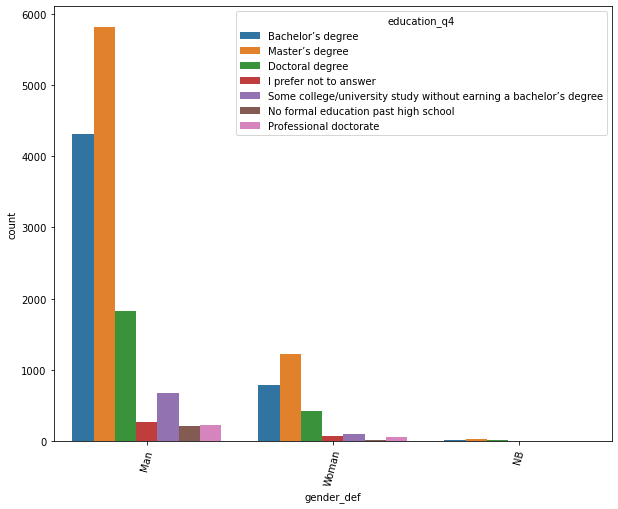

In [134]:
plt.figure(figsize =(10,8))
sns.countplot(x=df_def_fomacion2['gender_def'],data = df_def_fomacion2 , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

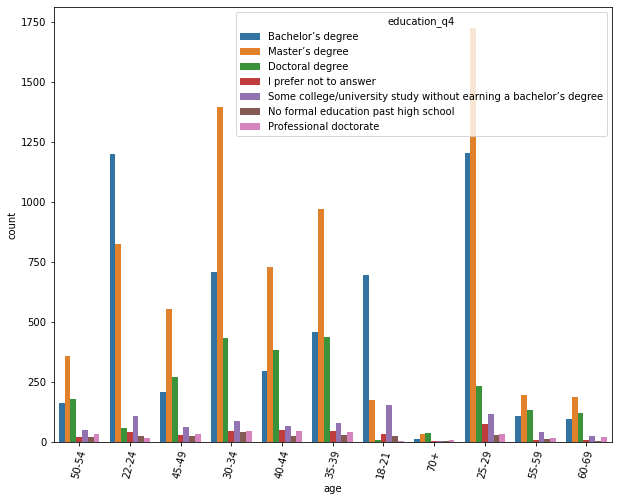

In [135]:
plt.figure(figsize =(10,8))
sns.countplot(x=df_def_fomacion2['age'],data = df_def_fomacion2 , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

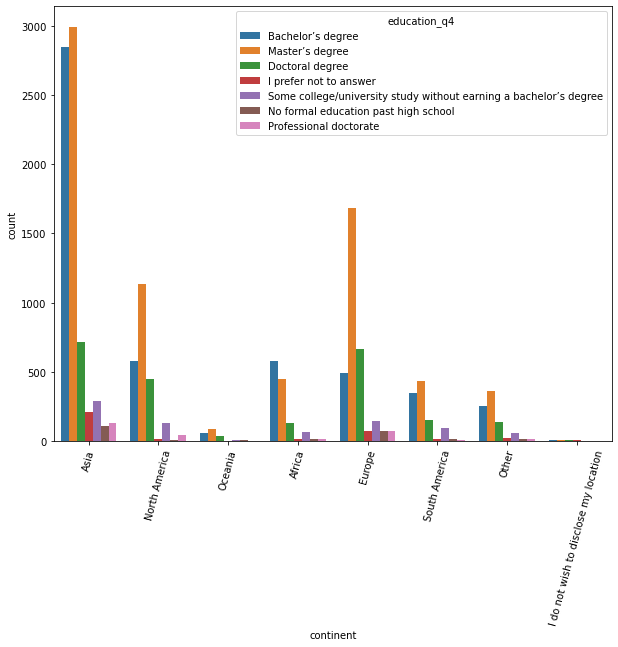

In [136]:
plt.figure(figsize =(10,8))
sns.countplot(x=df_def_fomacion2['continent'],data = df_def_fomacion2 , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

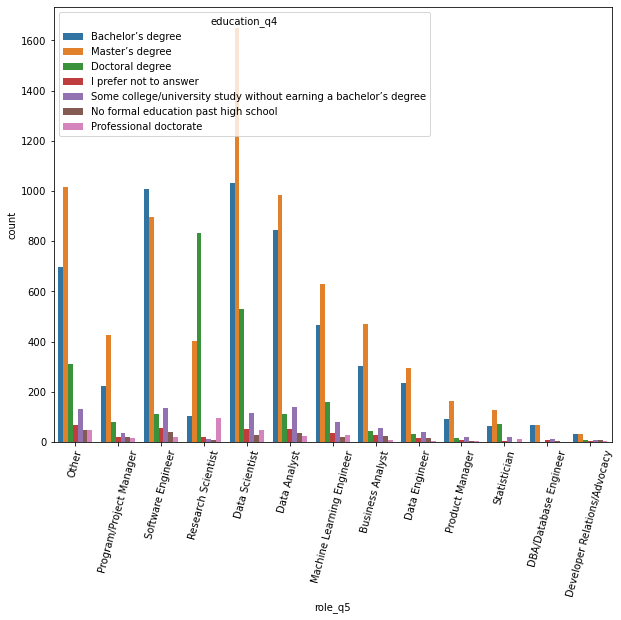

In [137]:
plt.figure(figsize =(10,8))
sns.countplot(x=df_def_fomacion2['role_q5'],data = df_def_fomacion2 , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

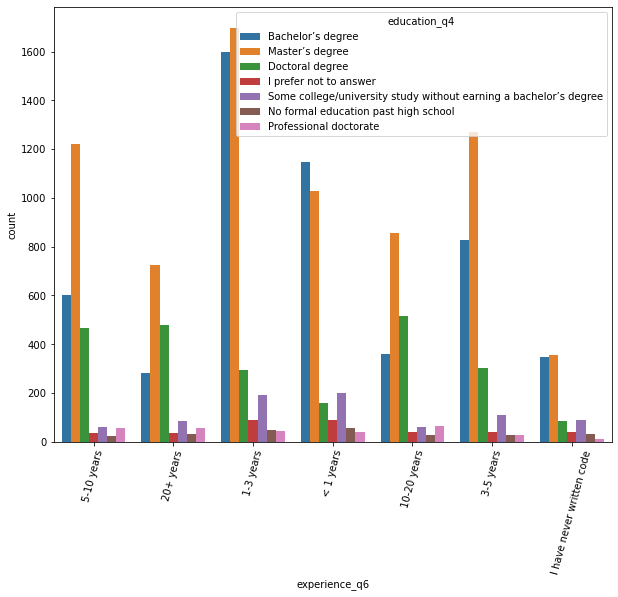

In [138]:
plt.figure(figsize =(10,8))
sns.countplot(x=df_def_fomacion2['experience_q6'],data = df_def_fomacion2 , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

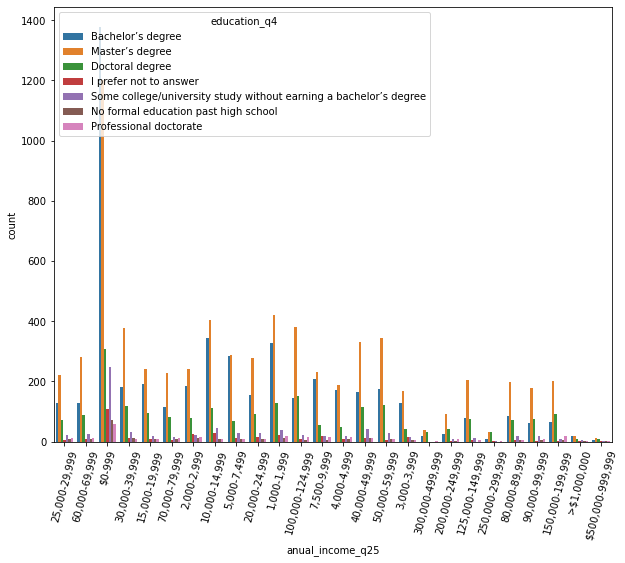

In [139]:
plt.figure(figsize =(10,8))
sns.countplot(x=df_def_fomacion2['anual_income_q25'],data = df_def_fomacion2 , hue='education_q4')
plt.xticks(rotation= 75)
plt.show()

En los countplot, vemos predominancia de los estudios de master, seguidos de los de doctorado, mas de cerca según aumentamos los años de experiencia y edad. Por roles, analistas de datos e ingenieros de software, son los unicos grupos, en los que los encuestados en activo, predomina el master seguido de un grado y no de un doctorado.

In [140]:
df_def_fomacion.isnull().sum()

index                   0
time                    0
age                     0
gender_def            355
continent               0
country_q3              0
education_q4            0
role_q5                 0
experience_q6           0
sector_q20           9648
company_size_q21     9722
anual_income_q25    10582
dtype: int64

In [141]:
df_def_fomacion2.stb.freq(["education_q4", 'gender_def'])

,education_q4,gender_def,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Man,5813,36.078699,5813,36.078699
1,Bachelor’s degree,Man,4309,26.744042,10122,62.822741
2,Doctoral degree,Man,1830,11.357994,11952,74.180735
3,Master’s degree,Woman,1218,7.559583,13170,81.740318
4,Bachelor’s degree,Woman,790,4.903178,13960,86.643496
5,Some college/university study without earning ...,Man,676,4.195631,14636,90.839126
6,Doctoral degree,Woman,422,2.619166,15058,93.458292
7,I prefer not to answer,Man,270,1.675770,15328,95.134062
8,Professional doctorate,Man,232,1.439921,15560,96.573982
9,No formal education past high school,Man,218,1.353029,15778,97.927011


In [142]:
educacion_gen=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['gender_def']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_gen

gender_def,Man,NB,Woman
education_q4,,,
Bachelor’s degree,32.28,27.03,29.37
Doctoral degree,13.71,17.57,15.69
I prefer not to answer,2.02,4.05,2.68
Master’s degree,43.55,33.78,45.28
No formal education past high school,1.63,2.70,0.82
Professional doctorate,1.74,4.05,2.34
Some college/university study without earning a bachelor’s degree,5.06,10.81,3.83


In [143]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_gen)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el género de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el género de las personas en activo, con una p de {round(chi2[1], 2)}")

No existen diferencias significativas en el tipo de educacion según el género de las personas en activo, con una p de 0.63


In [144]:
df_def_fomacion2.stb.freq(["education_q4", 'continent'])

,education_q4,continent,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Asia,2992,18.327718,2992,18.327718
1,Bachelor’s degree,Asia,2844,17.421133,5836,35.748851
2,Master’s degree,Europe,1686,10.327718,7522,46.076570
3,Master’s degree,North America,1138,6.970904,8660,53.047473
4,Doctoral degree,Asia,713,4.367534,9373,57.415008
5,Doctoral degree,Europe,665,4.073507,10038,61.488515
6,Bachelor’s degree,Africa,581,3.558959,10619,65.047473
7,Bachelor’s degree,North America,579,3.546708,11198,68.594181
8,Bachelor’s degree,Europe,489,2.995406,11687,71.589587
9,Master’s degree,Africa,448,2.744257,12135,74.333844


In [145]:
educacion_continent=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['continent']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_continent

continent,Africa,Asia,Europe,I do not wish to disclose my location,North America,Oceania,Other,South America
education_q4,,,,,,,,
Bachelor’s degree,45.53,38.99,15.23,18.18,24.46,28.92,29.39,32.37
Doctoral degree,10.50,9.77,20.72,27.27,18.84,17.65,16.07,14.59
I prefer not to answer,1.49,2.89,2.24,24.24,0.80,0.49,2.76,1.22
Master’s degree,35.11,41.01,52.52,21.21,48.08,43.63,41.22,40.97
No formal education past high school,0.94,1.48,2.31,3.03,0.42,2.94,2.18,1.40
Professional doctorate,1.33,1.84,2.34,3.03,1.94,1.47,1.95,0.84
Some college/university study without earning a bachelor’s degree,5.09,4.02,4.64,3.03,5.45,4.90,6.43,8.61


In [146]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_continent)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el continente de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el continente de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el continente de las personas en activo, con una p de 0.0


In [147]:
df_def_fomacion2.stb.freq(["education_q4", 'age'])

,education_q4,age,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,25-29,1727,10.578867,1727,10.578867
1,Master’s degree,30-34,1399,8.569678,3126,19.148545
2,Bachelor’s degree,25-29,1207,7.393568,4333,26.542113
3,Bachelor’s degree,22-24,1200,7.350689,5533,33.892802
4,Master’s degree,35-39,973,5.960184,6506,39.852986
...,...,...,...,...,...,...
72,No formal education past high school,60-69,6,0.036753,16310,99.908116
73,Professional doctorate,18-21,5,0.030628,16315,99.938744
74,Some college/university study without earning ...,70+,4,0.024502,16319,99.963247
75,No formal education past high school,70+,3,0.018377,16322,99.981623


In [148]:
educacion_age=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['age']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_age

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Bachelor’s degree,63.30,52.77,35.26,25.66,22.25,18.61,17.74,19.81,20.85,20.51,12.87
Doctoral degree,0.73,2.59,6.81,15.64,21.09,24.00,23.06,21.86,25.87,26.07,36.63
I prefer not to answer,3.01,1.80,2.22,1.74,2.32,3.13,2.36,2.78,1.35,2.14,2.97
Master’s degree,16.03,36.24,50.45,50.63,46.96,45.80,46.71,43.12,38.22,39.96,31.68
No formal education past high school,2.46,1.14,0.88,1.45,1.45,1.50,2.20,2.42,2.51,1.28,2.97
Professional doctorate,0.46,0.66,0.96,1.74,2.03,2.82,2.70,4.11,3.28,4.70,8.91
Some college/university study without earning a bachelor’s degree,14.03,4.79,3.42,3.15,3.91,4.14,5.24,5.92,7.92,5.34,3.96


In [149]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_age)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de 0.0


In [150]:
df_def_fomacion2.stb.freq(["education_q4", 'experience_q6'])

,education_q4,experience_q6,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,1-3 years,1698,10.401225,1698,10.401225
1,Bachelor’s degree,1-3 years,1599,9.794793,3297,20.196018
2,Master’s degree,3-5 years,1271,7.785605,4568,27.981623
3,Master’s degree,5-10 years,1221,7.479326,5789,35.460949
4,Bachelor’s degree,< 1 years,1146,7.019908,6935,42.480858
5,Master’s degree,< 1 years,1029,6.303216,7964,48.784074
6,Master’s degree,10-20 years,858,5.255743,8822,54.039816
7,Bachelor’s degree,3-5 years,827,5.065850,9649,59.105666
8,Master’s degree,20+ years,724,4.434916,10373,63.540582
9,Bachelor’s degree,5-10 years,601,3.681470,10974,67.222052


In [151]:
educacion_experiencia=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['experience_q6']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_experiencia

experience_q6,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code
education_q4,,,,,,,
Bachelor’s degree,40.36,18.65,16.54,31.76,24.39,42.15,36.24
Doctoral degree,7.40,26.82,28.23,11.64,18.91,5.88,8.72
I prefer not to answer,2.27,2.08,2.01,1.54,1.46,3.24,4.05
Master’s degree,42.86,44.69,42.76,48.81,49.55,37.84,36.97
No formal education past high school,1.19,1.35,1.89,1.04,1.01,2.02,3.43
Professional doctorate,1.14,3.28,3.43,1.08,2.23,1.47,1.35
Some college/university study without earning a bachelor’s degree,4.80,3.12,5.14,4.15,2.44,7.39,9.24


In [152]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_experiencia)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según la edad de las personas en activo, con una p de 0.0


In [153]:
df_def_fomacion2.stb.freq(["education_q4", 'role_q5'])

,education_q4,role_q5,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,Data Scientist,1651,10.113323,1651,10.113323
1,Bachelor’s degree,Data Scientist,1033,6.327718,2684,16.441041
2,Master’s degree,Other,1015,6.217458,3699,22.658499
3,Bachelor’s degree,Software Engineer,1007,6.168453,4706,28.826953
4,Master’s degree,Data Analyst,985,6.033691,5691,34.860643
...,...,...,...,...,...,...
84,I prefer not to answer,Developer Relations/Advocacy,4,0.024502,16316,99.944870
85,Professional doctorate,Developer Relations/Advocacy,3,0.018377,16319,99.963247
86,No formal education past high school,Product Manager,3,0.018377,16322,99.981623
87,Professional doctorate,Data Engineer,2,0.012251,16324,99.993874


In [154]:
educacion_puesto=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['role_q5']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_puesto

role_q5,Business Analyst,DBA/Database Engineer,Data Analyst,Data Engineer,Data Scientist,Developer Relations/Advocacy,Machine Learning Engineer,Other,Product Manager,Program/Project Manager,Research Scientist,Software Engineer,Statistician
education_q4,,,,,,,,,,,,,
Bachelor’s degree,32.68,41.77,38.55,36.75,29.93,35.56,33.05,30.09,30.46,27.17,7.04,44.46,21.55
Doctoral degree,4.55,0.63,5.12,5.05,15.30,6.67,11.11,13.38,5.63,9.55,56.40,4.94,24.24
I prefer not to answer,2.92,3.80,2.38,2.68,1.48,4.44,2.48,2.86,1.99,2.57,1.42,2.52,1.35
Master’s degree,50.76,43.67,45.04,46.53,47.84,33.33,44.44,43.94,53.64,52.26,27.29,39.51,43.10
No formal education past high school,2.38,2.53,1.60,2.21,0.78,6.67,1.34,2.08,0.99,2.20,0.61,1.77,0.00
Professional doctorate,0.65,0.00,1.05,0.32,1.33,3.33,2.05,2.03,1.32,2.08,6.50,0.84,3.37
Some college/university study without earning a bachelor’s degree,6.06,7.59,6.26,6.47,3.33,10.00,5.52,5.63,5.96,4.16,0.74,5.96,6.40


In [155]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_puesto)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el puesto de las personas en activo, con una p de 0.0


No handles with labels found to put in legend.


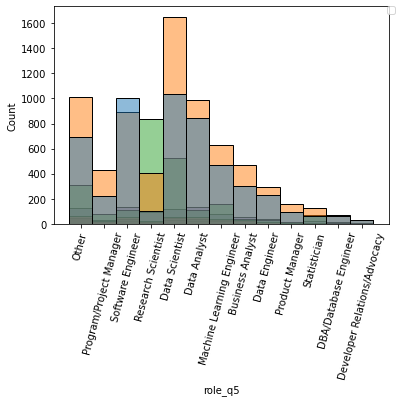

In [156]:
sns.histplot(x=df_def_fomacion2['role_q5'],data = df_def_fomacion2, hue='education_q4')
plt.legend(bbox_to_anchor = ( 1.02 , 1 ), borderaxespad = 0 )
plt.xticks(rotation= 75);

In [157]:
df_def_fomacion2.stb.freq(["education_q4", 'anual_income_q25'])

,education_q4,anual_income_q25,count,percent,cumulative_count,cumulative_percent
0,Bachelor’s degree,$0-999,1376,8.940290,1376,8.940290
1,Master’s degree,$0-999,1200,7.796764,2576,16.737054
2,Master’s degree,"1,000-1,999",421,2.735365,2997,19.472419
3,Master’s degree,"10,000-14,999",404,2.624911,3401,22.097330
4,Master’s degree,"100,000-124,999",380,2.468975,3781,24.566305
...,...,...,...,...,...,...
172,No formal education past high school,">$1,000,000",1,0.006497,15387,99.974011
173,No formal education past high school,"$500,000-999,999",1,0.006497,15388,99.980508
174,I prefer not to answer,"250,000-299,999",1,0.006497,15389,99.987005
175,I prefer not to answer,"200,000-249,999",1,0.006497,15390,99.993503


In [158]:
educacion_sueldo=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['anual_income_q25']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_sueldo

anual_income_q25,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999",...,"4,000-4,999","40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000"
education_q4,,,,,,,,,,,,,,,,,,,,,
Bachelor’s degree,40.84,18.75,33.85,36.21,20.14,20.58,33.33,16.33,32.17,26.58,...,37.94,23.98,40.77,25.25,23.23,37.50,24.57,21.74,17.71,34.48
Doctoral degree,9.14,25.00,13.31,11.68,20.97,20.05,16.75,23.72,13.39,15.67,...,10.53,16.57,9.87,17.65,16.15,9.96,17.46,18.67,21.71,15.52
I prefer not to answer,3.18,3.12,2.17,3.05,0.97,1.32,1.57,0.51,4.17,2.39,...,1.97,1.74,1.72,0.86,1.27,3.08,1.29,1.53,0.57,5.17
Master’s degree,35.62,37.50,43.45,42.53,52.41,54.09,42.23,51.53,41.74,47.36,...,41.23,47.97,41.20,49.35,50.82,41.85,49.35,50.90,51.14,29.31
No formal education past high school,2.17,3.12,1.34,0.84,0.69,0.00,1.40,1.02,2.26,1.53,...,1.54,1.89,1.00,1.43,1.63,1.09,1.51,1.02,1.43,1.72
Professional doctorate,1.72,6.25,1.86,0.84,1.93,1.06,1.22,4.34,2.43,1.53,...,3.07,1.89,1.14,1.43,2.18,2.90,2.37,1.28,2.57,3.45
Some college/university study without earning a bachelor’s degree,7.33,6.25,4.02,4.84,2.90,2.90,3.49,2.55,3.83,4.94,...,3.73,5.96,4.29,4.02,4.72,3.62,3.45,4.86,4.86,10.34


In [159]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_sueldo)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion según el sueldo de las personas en activo, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion según el sueldo de las personas en activo, con una p de {round(chi2[1], 2)}")

Existen diferencias significativas en el tipo de educacion según el sueldo de las personas en activo, con una p de 0.0


In [160]:
df_def_fomacion2.stb.freq(["education_q4", 'company_size_q21'])

,education_q4,company_size_q21,count,percent,cumulative_count,cumulative_percent
0,Master’s degree,0-49 employees,1988,12.233093,1988,12.233093
1,Bachelor’s degree,0-49 employees,1822,11.211618,3810,23.444711
2,Master’s degree,"10,000 or more employees",1683,10.356286,5493,33.800997
3,Master’s degree,"1000-9,999 employees",1389,8.547166,6882,42.348163
4,Bachelor’s degree,"10,000 or more employees",1132,6.965725,8014,49.313888
5,Master’s degree,50-249 employees,1120,6.891884,9134,56.205772
6,Master’s degree,250-999 employees,956,5.882715,10090,62.088487
7,Bachelor’s degree,"1000-9,999 employees",823,5.064304,10913,67.152791
8,Bachelor’s degree,50-249 employees,774,4.762784,11687,71.915574
9,Doctoral degree,"1000-9,999 employees",574,3.532090,12261,75.447665


In [161]:
educacion_tamaño=pd.DataFrame(pd.crosstab(df_def_fomacion2['education_q4'],df_def_fomacion2['company_size_q21']).apply(lambda x:round(x*100/x.sum(), 2), axis=0))
educacion_tamaño

company_size_q21,0-49 employees,"10,000 or more employees","1000-9,999 employees",250-999 employees,50-249 employees
education_q4,,,,,
Bachelor’s degree,36.04,33.14,26.90,26.60,30.15
Doctoral degree,11.18,10.92,18.76,18.76,14.73
I prefer not to answer,2.63,1.64,2.09,2.23,2.38
Master’s degree,39.33,49.27,45.41,44.38,43.63
No formal education past high school,2.26,0.82,1.41,1.11,1.29
Professional doctorate,1.54,1.46,2.06,2.60,2.10
Some college/university study without earning a bachelor’s degree,7.02,2.75,3.37,4.32,5.73


In [162]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
chi2 = chi2_contingency(educacion_tamaño)
if chi2[1] <= .05:
    print(f"Existen diferencias significativas en el tipo de educacion personas en activo según el tamaño de la empresa, con una p de {round(chi2[1], 2)}")
else:
    print(f"No existen diferencias significativas en el tipo de educacion de las personas en activo según el tamaño de la empresa, con una p de {round(chi2[1], 2)}")

No existen diferencias significativas en el tipo de educacion de las personas en activo según el tamaño de la empresa, con una p de 0.99


In [163]:
df_def_fomacion['education_q4'].value_counts()*100/df_def_fomacion.shape[0]

Master’s degree                                                      39.009741
Bachelor’s degree                                                    38.143457
Doctoral degree                                                      10.761175
Some college/university study without earning a bachelor’s degree     6.680014
I prefer not to answer                                                2.414045
No formal education past high school                                  1.605513
Professional doctorate                                                1.386055
Name: education_q4, dtype: float64

In [164]:
df_def_fomacion['education_q4'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: education_q4, dtype: int64

In [165]:
df_def_fomacion2['education_q4'].value_counts()*100/df_def_fomacion2.shape[0]

Master’s degree                                                      43.840735
Bachelor’s degree                                                    31.607963
Doctoral degree                                                      14.082695
Some college/university study without earning a bachelor’s degree     4.869832
I prefer not to answer                                                2.248086
Professional doctorate                                                1.849923
No formal education past high school                                  1.500766
Name: education_q4, dtype: float64

In [166]:
df_def_fomacion2['education_q4'].value_counts()

Master’s degree                                                      7157
Bachelor’s degree                                                    5160
Doctoral degree                                                      2299
Some college/university study without earning a bachelor’s degree     795
I prefer not to answer                                                367
Professional doctorate                                                302
No formal education past high school                                  245
Name: education_q4, dtype: int64

Tenemos todos los datos con diferencias significativas excepto en la comparación por géneros y tamaño de empresa. La tendencia general es que a mayor antiguedad y edad, mayor grado de titulación, excepto en las regiones de sudafrica y estados unidos, que detras de las titulaciones de máster, viene en frecuencia el grado antes que el doctorado en la distribución por continentes.También se observan diferencias en cuanto al puesto, pero en general la tendencia es la misma, sigue predominando la titulación de máster.
El unico grupo que se mantiene en numero en activo es el de doctorado, presentando casi los mismos valores en la muestra general y en la muestra filtrada con trabajo.


En general, a mayor edad, mayor formacion, los doctorados, van bajando la proporcion con la edad, a la vez que va subiendo la licenciatura casi. El grado de master, mas o menos se mantiene, an los activos.